In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the diabetes dataset

In [2]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [3]:
## DIABETES DATASET DESCRIPTION
print(dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Step 2 : Divide the data into dependent and independent features

In [4]:
df_diabetes = pd.DataFrame(dataset.data, columns = ['age','sex','bm','bp','s1','s2', 's3', 's4', 's5','s6'])
X = df_diabetes
y = dataset['target']

## Step 3 : Divide the data into training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


### Note : For decision tree, we do not need to perform Standardization/Normalization

## Step 4 : Load the Decision Tree model

In [6]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor()
dtregressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Step 5 : Visualizing our decision tree

[Text(0.48889739458859677, 0.9736842105263158, 'x[8] <= -0.01\nsquared_error = 6020.292\nsamples = 353\nvalue = 153.051'),
 Text(0.2756460182656197, 0.9210526315789473, 'x[2] <= 0.006\nsquared_error = 3016.469\nsamples = 165\nvalue = 106.061'),
 Text(0.3822717064271082, 0.9473684210526316, 'True  '),
 Text(0.15866656708774327, 0.868421052631579, 'x[5] <= 0.113\nsquared_error = 1984.199\nsamples = 131\nvalue = 92.725'),
 Text(0.1559352594742233, 0.8157894736842105, 'x[8] <= -0.034\nsquared_error = 1800.342\nsamples = 130\nvalue = 91.492'),
 Text(0.05995006828269034, 0.7631578947368421, 'x[3] <= 0.099\nsquared_error = 1585.754\nsamples = 75\nvalue = 81.92'),
 Text(0.057218760669170365, 0.7105263157894737, 'x[0] <= 0.08\nsquared_error = 1360.961\nsamples = 74\nvalue = 80.108'),
 Text(0.05448745305565039, 0.6578947368421053, 'x[8] <= -0.073\nsquared_error = 1183.318\nsamples = 73\nvalue = 78.479'),
 Text(0.024581768521679755, 0.6052631578947368, 'x[9] <= -0.04\nsquared_error = 348.095\nsam

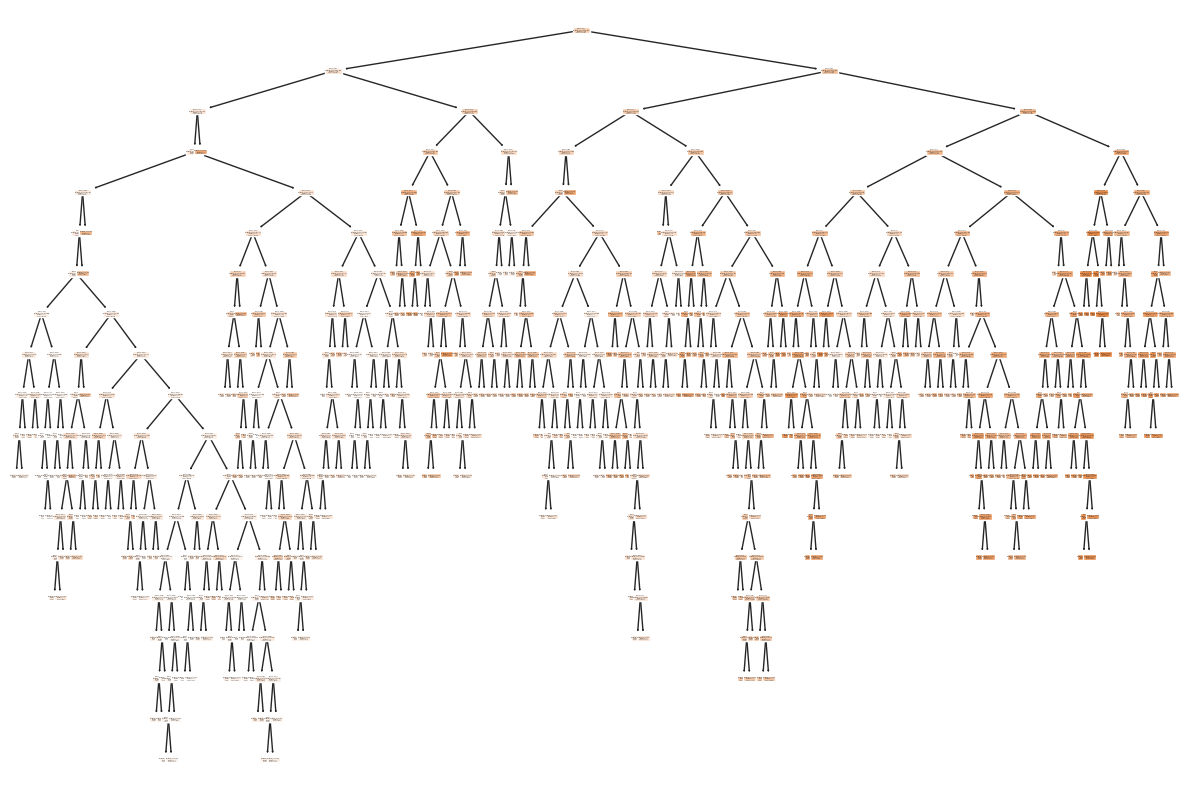

In [7]:
# VISUALIZE THE RESULTING DECISION TREE
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtregressor,filled=True)

In [8]:
y_pred = dtregressor.predict(X_test)

## Step 6 : Performance Metrics

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

60.51685393258427
6177.348314606742
78.59610877522336
-0.11208957886087845


## Step 7 : Pre-pruning Techniques (Hyperparameter Tuning)

In [10]:
params = {
    
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : [ 'best', 'random'],
    'max_depth' : [1,2,3,4,5,6],
    'max_features' : ['auto', 'sqrt', 'log2'],
}

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtregressor, param_grid = params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [12]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'random'}
-3720.477920867774


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_tuned = grid.predict(X_test)
mae = mean_absolute_error(y_test,y_pred_tuned)
mse = mean_squared_error(y_test,y_pred_tuned)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred_tuned)
print(mae)
print(mse)
print(rmse)
print(score)

55.5796017235823
4966.669350996422
70.47460075088344
0.10586534130988712
